<a href="https://colab.research.google.com/github/Arta-DS/py_analytics_HWs/blob/main/%D0%AD%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [55]:
df = pd.read_csv('international-airline-passengers.csv', index_col='Month', parse_dates=True)

# Создание серии временных данных
series = df['Count']

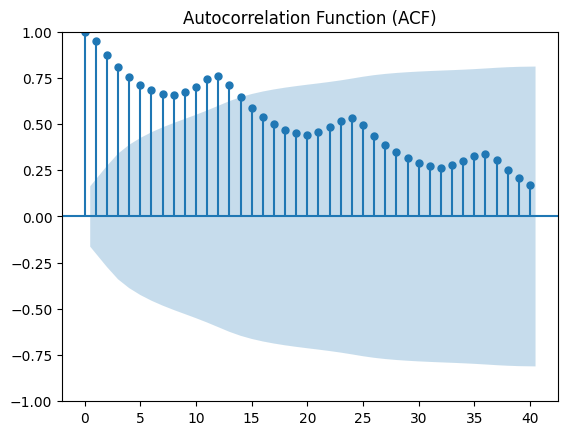

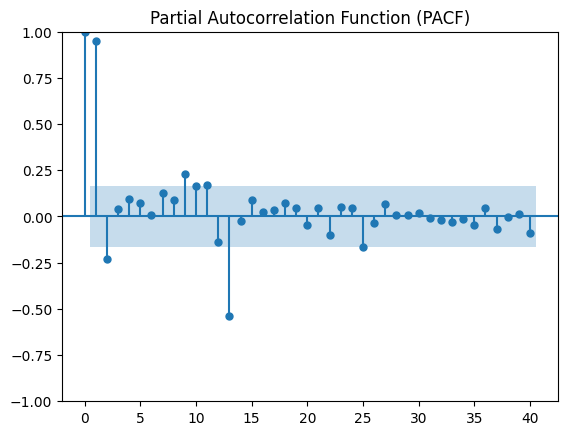

In [56]:
# График автокорреляционной функции (ACF)
plot_acf(series, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# График частной автокорреляционной функции (PACF)
plot_pacf(series, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [57]:
# Приближение стационарного ряда моделью MA(1)
ma_stationary_model = ARIMA(stationary_series, order=(0, 0, 1)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [58]:
# Прогнозирование значений
ma_stationary_predictions = ma_stationary_model.predict()

# Оценка качества модели (RMSE)
rmse_stationary = np.sqrt(mean_squared_error(stationary_series, ma_stationary_predictions))
print(f'RMSE для стационарного ряда: {rmse_stationary:.4f}')

RMSE для стационарного ряда: 33.9759


In [59]:
# Фитинг модели TEMA (Holt-Winters)
hw_model = ExponentialSmoothing(series, trend='additive', seasonal='multiplicative', seasonal_periods=12).fit()

# Предсказание значений
hw_forecast = hw_model.forecast(steps=24)

# Оценка качества модели (RMSE)
rmse_hw = np.sqrt(mean_squared_error(series[-24:], hw_forecast))
print(f'RMSE для модели TEMA: {rmse_hw:.4f}')

RMSE для модели TEMA: 76.8211


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


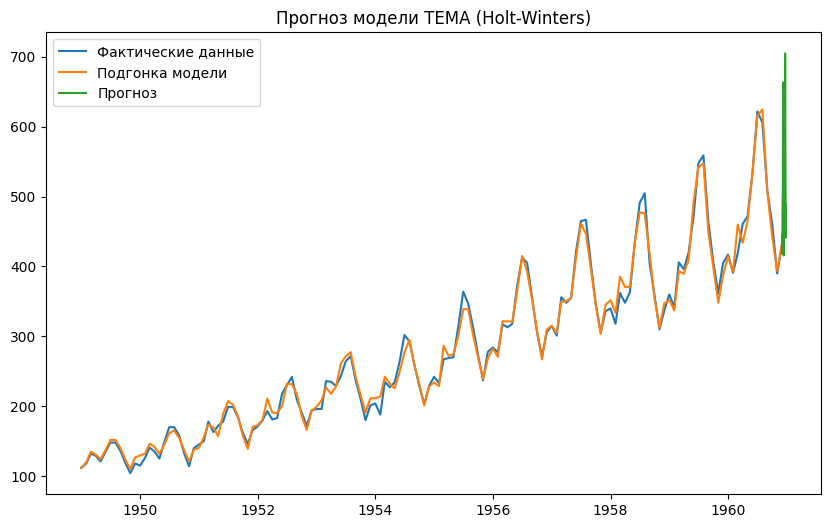

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(series, label='Фактические данные')
plt.plot(hw_model.fittedvalues, label='Подгонка модели')
plt.plot(pd.date_range(start=series.index[-1], periods=25)[1:], hw_forecast, label='Прогноз')
plt.legend(loc='best')
plt.title('Прогноз модели TEMA (Holt-Winters)')
plt.show()


In [60]:
# Приближение нестационарного ряда моделью MA(1)
ma_non_stationary_model = ARIMA(series, order=(0, 0, 1)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [61]:
# Прогнозирование значений
ma_non_stationary_predictions = ma_non_stationary_model.predict()

# Оценка качества модели (RMSE)
rmse_non_stationary = np.sqrt(mean_squared_error(series, ma_non_stationary_predictions))
print(f'RMSE для нестационарного ряда: {rmse_non_stationary:.4f}')

RMSE для нестационарного ряда: 66.1994


Оценивая полученные значения RMSE для разных моделей, можно сделать несколько выводов и предложений по выбору наиболее подходящей модели.

### 1. Оценка качества моделей

- Стационарный ряд:
  - RMSE = 33.9759. Модель MA(1) показывает хорошую точность для стационарного ряда. Низкий показатель RMSE указывает на высокую степень соответствия модели фактическим данным.

- Нестационарный ряд:
  - RMSE для MA(1) = 66.1994. Модель MA(1) не столь точно описывает нестационарный ряд, что отражается в высоком значении RMSE.
  - RMSE для TEMA = 76.8211. Модель TEMA также показывает довольно высокое значение RMSE, что говорит о недостаточной точности даже несмотря на учет тренда и сезонности.

### 2. Соображения по выбору модели

- MA(1) для стационарного ряда:
  - Выбор модели MA(1) оправдан для стационарного ряда, так как она эффективно учитывает краткосрочную зависимость ошибок, характерную для таких рядов. Модель демонстрирует низкий уровень ошибки (RMSE), что подтверждает её пригодность.

- MA(1) для нестационарного ряда:
  - Модель MA(1) недостаточно точно отражает поведение нестационарного ряда, что выражается в высоком RMSE. Причина кроется в неспособности модели учитывать тренды и сезонные колебания, характерные для нестационарных рядов.

- TEMA для нестационарного ряда:
  - Модель TEMA предназначена для учёта тренда и сезонности, что делает её потенциально полезной для нестационарных рядов. Однако полученный высокий RMSE указывает на то, что данная реализация модели не смогла достичь высокой точности. Возможно, потребуются дополнительные настройки или более детальная настройка параметров модели.

### 3. Рекомендации по дальнейшему улучшению

- Экспериментирование с параметрами модели TEMA:
  - Попробовать различные комбинации параметров для тренда и сезонности. Возможно, оптимизация этих параметров улучшит качество модели.

- Использование ARIMA:
  - Рассмотреть применение модели ARIMA для нестационарного ряда. Модель ARIMA включает компонент интеграции (I), который помогает справиться с нестационарностью. Можем попробовать разные порядки (p, d, q) для нахождения оптимальной конфигурации.

- Автоматическая настройка параметров:
  - Использовать инструменты автоматической настройки параметров, такие как auto_arima из библиотеки pmdarima, чтобы найти оптимальное сочетание параметров p, d и q для модели ARIMA.

- Дополнительные модели:
  - Исследовать другие подходы, такие как Prophet (для временных рядов с трендом и сезонностью) или SARIMA (учёт сезонности в рамках ARIMA).

Таким образом, для стационарного ряда модель MA(1) остается лучшим вариантом, в то время как для нестационарного ряда необходимы дальнейшие исследования и эксперименты с настройками моделей TEMA или переход на ARIMA/SARIMA для повышения точности.

In [63]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.4 MB/s eta 0:00:00


In [64]:
from pmdarima.arima import auto_arima

# Автоматически подберём параметры p, d, q для нестационарного ряда
auto_arima_model = auto_arima(series, start_p=0, start_q=0,
                              max_p=5, max_q=5, m=12,
                              start_P=0, seasonal=True,
                              d=None, D=1, trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

# Тренировка модели
auto_arima_fit = auto_arima_model.fit(series)

# Прогнозирование значений
auto_arima_forecast = auto_arima_fit.predict(n_periods=24)

# Оценка качества модели (RMSE)
rmse_auto_arima = np.sqrt(mean_squared_error(series[-24:], auto_arima_forecast))
print(f'RMSE для модели Auto ARIMA: {rmse_auto_arima:.4f}')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=3.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=2.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=12.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=2.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,1,0)[12]             : AIC=1021.148, Time=3.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,1,0)[12]             : AIC=1022.805, Time=3.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[12] intercept   : AIC=1021.017, Time=0.81 sec

Best model:  ARIMA(0,1,1)(2,1,0)[12]          
Total fit time: 40.009 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RMSE для модели Auto ARIMA: 86.1420


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 auto_arima выбрал модель ARIMA(0,1,1)(2,1,0)[12], что означает:
   - ARIMA(0,1,1):
     - Нет авторегрессивных компонентов (p=0),
     - Первая разность (d=1),
     - Один компонент скользящего среднего (q=1).
   - Seasonal ARIMA(2,1,0)[12]:
     - Два сезонных авторегрессивных компонента (P=2),
     - Первая сезонная разность (D=1),
     - Без сезонных компонентов скользящего среднего (Q=0),
     - Сезонность каждые 12 периодов (обычно месяцев).

2. Время подгонки модели:
   
Python


   Total fit time: 40.009 seconds
   
   Время подгонки составило примерно 40 секунд, что приемлемо для большинства задач.

3. Оценка качества модели (RMSE):
   
   RMSE для модели Auto ARIMA: 86.1420
   
   Полученное значение RMSE довольно высоко, что указывает на значительную погрешность в прогнозировании. Это может означать, что модель не совсем адекватно отражает динамику временного ряда.

Рекомендации:

1. Экспериментирование с параметрами:
   - Можно попытаться увеличить максимальные значения max_p, max_q, max_P, max_Q для поиска более сложной модели.
   - Увеличение параметра m (периодичности сезонности) или его уменьшение, если данные показывают другую периодичность.

2. Другие методы прогнозирования:
   - Рассмотреть альтернативные модели, такие как Prophet (особенно для временных рядов с явными трендами и сезонностью) или SARIMAX, который добавляет возможность учитывать экзогенные факторы.

3. Детали данных:
   - Важно понимать природу временных рядов, чтобы правильно выбирать параметры сезонности и степени разностной операции.

4. Регуляризация и гиперпараметры:
   - Поэкспериментировать с регуляризацией (L1, L2) и другими гиперпараметрами модели, чтобы увидеть, как это повлияет на точность.

5. Разбиение данных:
   - Попробовать разделить данные на тренировочный и тестовый наборы, чтобы получить более точное представление о производительности модели на новых данных.

В целом, использование auto_arima дало интересные результаты, однако RMSE остается высоким, что намекает на возможное улучшение модели или необходимость дополнительного анализа данных.